# √Årboles de Decisi√≥n

## Proyecto 2 - Entrega 2

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier,  RandomForestRegressor


#imports para el modelo de arbol de decision
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [2]:
df = pd.read_csv('data/standarized_df.csv')
df.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          20         70.0     8400    -0.820445     0.372217  -0.455469   
1          60         59.0     7837    -0.088934     1.268609   0.718609   
2          30         67.0     8777    -0.820445     1.268609  -1.988293   
3          50         60.0     7200    -0.820445     1.268609  -1.107734   
4          50         50.0     5000    -0.820445     0.372217  -1.531707   

   YearRemodAdd  MasVnrArea  ExterQual  ExterCond  ...  SaleType_ConLw  \
0     -1.346063         0.0          3          2  ...           False   
1      0.439214         0.0          2          4  ...           False   
2     -1.683818         0.0          3          4  ...           False   
3     -1.683818       252.0          3          4  ...           False   
4     -1.683818         0.0          3          4  ...           False   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0         False         False         True                  False   
1         False         False         True                  False   
2         False         False         True                  False   
3         False         False         True                  False   
4         False         False         True                  False   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                  False                 False                 False   
1                  False                 False                 False   
2                  False                 False                 False   
3                  False                 False                 False   
4                  False                 False                 False   

   SaleCondition_Normal  SaleCondition_Partial  
0                  True                  False  
1                  True                  False  
2                  True                  False  
3                  True                  False  
4                  True                  False  

[5 rows x 252 columns]

### Tipos de Variables

En esta etapa se identific√≥ el tipo de variables para posteriormente escoger las estrategias de imputaci√≥n para valores nulos seg√∫n el tipo de variable.

In [3]:
# Diccionario que mapea las columnas a su tipo de variable
column_types = {
  "MSZoning": "Nominal",
  "Street": "Nominal",
  "Alley": "Nominal",
  "LotShape": "Nominal",
  "LandContour": "Nominal",
  "Utilities": "Nominal",
  "LotConfig": "Nominal",
  "LandSlope": "Nominal",
  "Neighborhood": "Nominal",
  "Condition1": "Nominal",
  "Condition2": "Nominal",
  "BldgType": "Nominal",
  "HouseStyle": "Nominal",
  "RoofStyle": "Nominal",
  "RoofMatl": "Nominal",
  "Exterior1st": "Nominal",
  "Exterior2nd": "Nominal",
  "MasVnrType": "Nominal",
  "Foundation": "Nominal",
  "BsmtQual": "Nominal",
  "BsmtCond": "Nominal",
  "BsmtExposure": "Nominal",
  "BsmtFinType1": "Nominal",
  "BsmtFinType2": "Nominal",
  "Heating": "Nominal",
  "CentralAir": "Nominal",
  "Electrical": "Nominal",
  "GarageType": "Nominal",
  "GarageFinish": "Nominal",
  "PavedDrive": "Nominal",
  "MiscFeature": "Nominal",
  "SaleType": "Nominal",
  "SaleCondition": "Nominal",
  "MSSubClass": "Ordinal",
  "OverallQual": "Ordinal",
  "OverallCond": "Ordinal",
  "ExterQual": "Ordinal",
  "ExterCond": "Ordinal",
  "HeatingQC": "Ordinal",
  "KitchenQual": "Ordinal",
  "Functional": "Ordinal",
  "FireplaceQu": "Ordinal",
  "GarageQual": "Ordinal",
  "GarageCond": "Ordinal",
  "PoolQC": "Ordinal",
  "Fence": "Ordinal",
  "LotArea": "Discreta",
  "YearBuilt": "Discreta",
  "YearRemodAdd": "Discreta",
  "BsmtFinSF1": "Discreta",
  "BsmtFinSF2": "Discreta",
  "BsmtUnfSF": "Discreta",
  "TotalBsmtSF": "Discreta",
  "1stFlrSF": "Discreta",
  "2ndFlrSF": "Discreta",
  "LowQualFinSF": "Discreta",
  "GrLivArea": "Discreta",
  "BsmtFullBath": "Discreta",
  "BsmtHalfBath": "Discreta",
  "FullBath": "Discreta",
  "HalfBath": "Discreta",
  "BedroomAbvGr": "Discreta",
  "KitchenAbvGr": "Discreta",
  "TotRmsAbvGrd": "Discreta",
  "Fireplaces": "Discreta",
  "GarageYrBlt": "Discreta",
  "GarageCars": "Discreta",
  "GarageArea": "Discreta",
  "WoodDeckSF": "Discreta",
  "OpenPorchSF": "Discreta",
  "EnclosedPorch": "Discreta",
  "3SsnPorch": "Discreta",
  "ScreenPorch": "Discreta",
  "PoolArea": "Discreta",
  "MiscVal": "Discreta",
  "MoSold": "Discreta",
  "YrSold": "Discreta",
  "LotFrontage": "Continua",
  "MasVnrArea": "Continua",
  "SalePrice": "Continua"
}

### Estrategia Para Manejo de Datos Nulos

Se utiliz√≥ el siguiente c√≥digo para identificar la cantidad de valores nulos, lo cual nos arroja un total de 1460 registros con valores nulos y en todo el dataset tenemos 7829 celdas.


In [4]:
# Guarda el n√∫mero, nombre, cantidad de valores nulos de la columna y el tipo de variable de un csv si tienen valores nulos
# Retorna True/False si encontr√≥ nulos
def saveNullInfo(data, fileSave):
  total_null_rows = data.isnull().any(axis=1).sum()
  total_null_values = data.isnull().sum().sum()
  
  with open(fileSave, "w") as f:
    for i, (col, null_count) in enumerate(data.isnull().sum().items(), start=1):
      if null_count > 0:
        # Obtener el tipo de la columna desde el diccionario column_types
        column_type = column_types.get(col, "Desconocido")
        f.write(f"{i}, {col}, {null_count}, {column_type}\n")
    
    f.write(f"\nTotal registros con valores nulos: {total_null_rows}\n")  # Filas con nulos
    f.write(f"Total valores nulos en el DataFrame: {total_null_values}\n")  # Total de valores nulos
  
  print(f"Archivo '{fileSave}' generado correctamente.")
  return total_null_values > 0

# Ejemplo de uso:
result_nulls = saveNullInfo(data=df, fileSave="null_columns_info.txt")
print("Existen Valores Nulos" if result_nulls else "No Existen Valores Nulos")

Archivo 'null_columns_info.txt' generado correctamente.
Existen Valores Nulos


#### Nulos - Num√©ricas

Las columnas **LotFrontage** (con 259 valores nulos), **MasVnrArea** (con 8 valores nulos) y **GarageYrBlt** (con 81 valores nulos) son variables num√©ricas. En este caso, se utilizpo la estrategia de imputaci√≥n de valores nulos con **la media** para las columnas **LotFrontage** y **GarageYrBlt**, debido a que ambas variables presentan una distribuci√≥n sim√©trica, como lo indica que la media y la mediana est√©n cerca. Para la columna **MasVnrArea**, se optar√° por la **mediana** debido a su distribuci√≥n sesgada, ya que la mediana se ajusta mejor a los valores nulos y reduce el impacto de los valores extremos (cerca de 0). Esta estrategia de imputaci√≥n es una opci√≥n segura para preservar la integridad de los datos, manteniendo la coherencia y la distribuci√≥n de los valores en las columnas.

- [Enlace de Referencia](https://medium.com/@suyebaanjum98/mastering-null-value-handling-a-comprehensive-guide-to-replacing-missing-data-in-your-dataset-1a0bf711e531)

In [5]:
print(df[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].describe())

       LotFrontage   MasVnrArea   GarageYrBlt
count   951.000000  1162.000000  1.104000e+03
mean     70.343849   103.771945 -2.928414e-15
std      24.897021   173.032238  1.000453e+00
min      21.000000     0.000000 -3.182417e+00
25%      59.000000     0.000000 -6.842106e-01
50%      70.000000     0.000000  5.412560e-02
75%      80.000000   166.000000  9.441748e-01
max     313.000000  1378.000000  1.267829e+00


In [6]:
if result_nulls:
  df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())
  df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())
  df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())
  result = saveNullInfo(data=df, fileSave="null_columns_info_without_numerics.txt")

Archivo 'null_columns_info_without_numerics.txt' generado correctamente.


### Predicci√≥n del precio de casas 

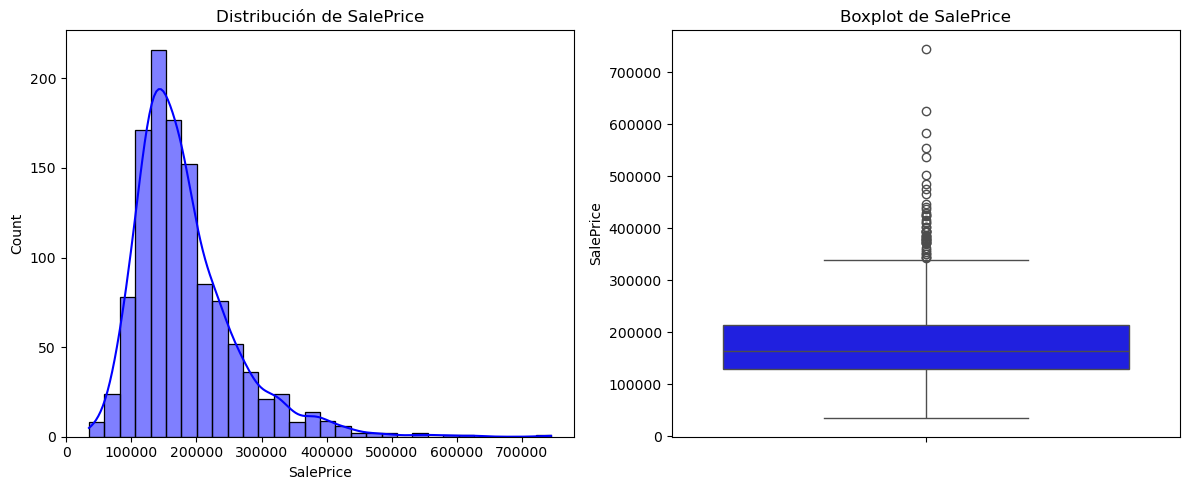

In [7]:
# 1 Exploraci√≥n de la distribuci√≥n de `SalePrice`
plt.figure(figsize=(12, 5))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(df["SalePrice"], bins=30, kde=True, color='blue')
plt.title("Distribuci√≥n de SalePrice")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=df["SalePrice"], color='blue')
plt.title("Boxplot de SalePrice")

plt.tight_layout()
plt.show()

* El histograma nos revela que la distribuci√≥n de precios est√° sesgada a la derecha, lo que significa que hay muchas casas con precios bajos o intermedios y pocas casas con precios extremadamente altos.

* El boxplot confirma que existen outliers (casas con precios mucho m√°s altos que el resto), pero no los eliminamos porque representan propiedades de lujo reales.

/tmp/ipykernel_13926/1091231170.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["price_category"], palette="Set2")


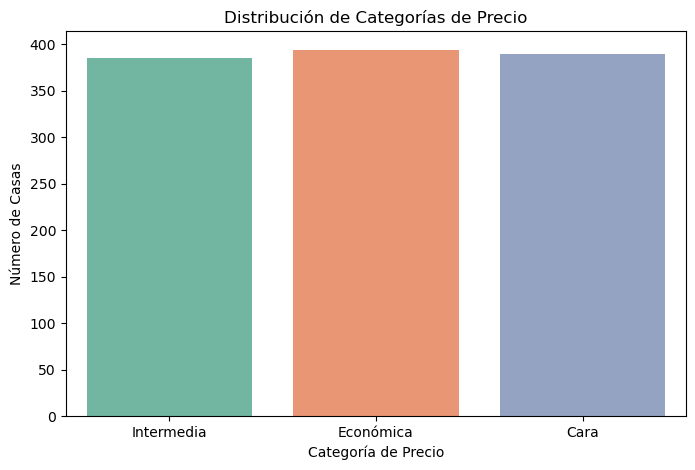

In [8]:
# 2Ô∏è Definir los umbrales de clasificaci√≥n
q1 = df["SalePrice"].quantile(0.33)  # Percentil 33%
q2 = df["SalePrice"].quantile(0.66)  # Percentil 66%

# 3Ô∏è Crear la nueva variable categ√≥rica `price_category`
def categorize_price(price):
    if price <= q1:
        return "Econ√≥mica"
    elif price <= q2:
        return "Intermedia"
    else:
        return "Cara"

df["price_category"] = df["SalePrice"].apply(categorize_price)

# 4Ô∏è Visualizar la segmentaci√≥n
plt.figure(figsize=(8, 5))
sns.countplot(x=df["price_category"], palette="Set2")
plt.title("Distribuci√≥n de Categor√≠as de Precio")
plt.xlabel("Categor√≠a de Precio")
plt.ylabel("N√∫mero de Casas")
plt.show()



El gr√°fico de barras muestra que la cantidad de casas en cada categor√≠a es similar (~390 por grupo).

In [9]:
# Mostrar la cantidad de casas en cada categor√≠a

category_counts = df["price_category"].value_counts().reset_index()
category_counts.columns = ["Categor√≠a", "Cantidad de Casas"]
display(category_counts)


Categor√≠a  Cantidad de Casas
0   Econ√≥mica                394
1        Cara                389
2  Intermedia                385

La segmentaci√≥n est√° bien distribuida y evitar√° problemas de desbalance en la clasificaci√≥n.

### √Årbol de regresi√≥n con todas las variables disponibles

In [10]:
print(df.dtypes)

MSSubClass                 int64
LotFrontage              float64
LotArea                    int64
OverallQual              float64
OverallCond              float64
                          ...   
SaleCondition_Alloca        bool
SaleCondition_Family        bool
SaleCondition_Normal        bool
SaleCondition_Partial       bool
price_category            object
Length: 253, dtype: object


In [11]:
obj_columns = df.select_dtypes(exclude=['int64', 'float64'], include=['object']).columns # ahora para las variables tipo objeto
print(df[obj_columns])

     price_category
0        Intermedia
1        Intermedia
2         Econ√≥mica
3        Intermedia
4         Econ√≥mica
...             ...
1163     Intermedia
1164      Econ√≥mica
1165      Econ√≥mica
1166     Intermedia
1167     Intermedia

[1168 rows x 1 columns]


In [12]:
df_cleaned = pd.get_dummies(df, columns=['price_category'], drop_first=True) # drop first es para evitar multicolinearidad


In [13]:
df_cleaned.dtypes

MSSubClass                     int64
LotFrontage                  float64
LotArea                        int64
OverallQual                  float64
OverallCond                  float64
                              ...   
SaleCondition_Family            bool
SaleCondition_Normal            bool
SaleCondition_Partial           bool
price_category_Econ√≥mica        bool
price_category_Intermedia       bool
Length: 254, dtype: object

In [14]:
boolean_columns = df_cleaned.select_dtypes(exclude=['int64', 'float64', 'object'], include=['bool']).columns # obtener variables booleanas
print(df_cleaned[boolean_columns].head())

   MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0             False        False        False         True        False   
1             False        False        False         True        False   
2             False        False        False         True        False   
3             False        False        False         True        False   
4             False        False        False         True        False   

   Street_Grvl  Street_Pave  Alley_Grvl  Alley_Pave  LotShape_IR1  ...  \
0        False         True       False       False         False  ...   
1        False         True       False       False          True  ...   
2        False         True       False       False         False  ...   
3        False         True       False       False         False  ...   
4        False         True       False        True         False  ...   

   SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  SaleCondition_AdjLand  \
0         False         Tr

In [15]:
df_cleaned[boolean_columns] = df_cleaned[boolean_columns].astype(int) # convertir a enteros
print(df_cleaned[boolean_columns].head())

   MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0                 0            0            0            1            0   
1                 0            0            0            1            0   
2                 0            0            0            1            0   
3                 0            0            0            1            0   
4                 0            0            0            1            0   

   Street_Grvl  Street_Pave  Alley_Grvl  Alley_Pave  LotShape_IR1  ...  \
0            0            1           0           0             0  ...   
1            0            1           0           0             1  ...   
2            0            1           0           0             0  ...   
3            0            1           0           0             0  ...   
4            0            1           0           1             0  ...   

   SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  SaleCondition_AdjLand  \
0             0           

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


X = df_cleaned.drop("SalePrice", axis=1)
y = df_cleaned['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=5)

model = DecisionTreeRegressor(random_state=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}")
print(f"R^2: {r2}")

MSE: 1191040871.7905984
R^2: 0.8269038234456552


### An√°lisis del √°rbol con todas las variables
El √°rbol presenta un r^2 de 0.85, lo cual indica que quiz√° no existe overfitting. Sin embargo, el MSE qued√≥ bastante alto, lo cual nos indica que el modelo se desv√≠a de predecir los valores reales. Lo cual significa que el √°rbol no tenga buen desempe√±o a la hora de predecir los precios. 

### 3 modelos m√°s

In [17]:
# variables que vamos a utilizar
variables = ["OverallQual", "GrLivArea", "TotalBsmtSF", "GarageCars", 
             "GarageArea", "1stFlrSF", "FullBath", "TotRmsAbvGrd"]

### SVM 

In [18]:
from sklearn.svm import SVR

svm_class = SVR(kernel='linear', C=1.0, epsilon=0.1) 
svm_class.fit(X_train, y_train)


X_train_subset = X_train[variables]

svm_class = SVR(kernel='linear', C=1.0, epsilon=0.1)
svm_class.fit(X_train_subset, y_train)


X_test_subset = X_test[variables]


y_pred_svc = svm_class.predict(X_test_subset)


mse_svm = mean_squared_error(y_test, y_pred_svc)
r2_svm = r2_score(y_test, y_pred_svc)
print(f"MSE: {mse_svm}")
print(f"R^2: {r2_svm}")


MSE: 2451837081.4482555
R^2: 0.6436699744024628


### Random Forest
Random forest pero solamente con las variables elegidas al inicio

In [19]:
from sklearn.ensemble import RandomForestRegressor 

rndm_frst = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=5)

X_train_rndm = X_train[variables]
X_test_rndom = X_test[variables]

rndm_frst.fit(X_train_rndm, y_train)
y_pred_rndm = rndm_frst.predict(X_test_rndom) # predecir

print(f"MSE: {mean_squared_error(y_test, y_pred_rndm)}")
print(f"R^2: {r2_score(y_test, y_pred_rndm)}")

MSE: 1396850395.8828542
R^2: 0.7969931440033277


### KNN

In [20]:
from sklearn.neighbors import KNeighborsRegressor # empleando KNN
knn_reg = KNeighborsRegressor(n_neighbors=5)

X_train_knn = X_train[variables]
X_test_knn = X_test[variables]

knn_reg.fit(X_train_knn, y_train)

y_pred_knn = knn_reg.predict(X_test_knn)

print(f"MSE: {mean_squared_error(y_test, y_pred_knn)}")
print(f"R^2: {r2_score(y_test, y_pred_knn)}")

MSE: 2569600796.3220515
R^2: 0.6265551555374775


### Ajuste a la profundidad del √°rbol de regresi√≥n

In [21]:
model = DecisionTreeRegressor(random_state=5, max_depth=6)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}")
print(f"R^2: {r2}")

MSE: 1046806653.3615404
R^2: 0.847865649634575


Haciendo el ajute de profundidad a 6, a prueba y error, llegamos a una mejora algo significativa del modelo. Mejor R^2 y disminuci√≥n del MSE.

### Comparaci√≥n con el modelo de regresi√≥n lineal anterior

Si comparamos el desempe√±o del modelo linear anterior con el desempe√±o del √°rbol con todas sus variables tenemos lo siguiente: 

Modelo Linear con todas las num√©ricas:

MSE:  `5.2312261686805615e-21`
RMSE:  `7.2327215961079e-11`
R^2:  `1.0`

Modelo Regresi√≥n del √Årbol con todas las varibles:

MSE: `1191040871.7905984`
R^2: `0.8269038234456552`

Entonces podemos ver que el modelo linear presenta un overfitting mientras que el modelo de regresi√≥n, pese a que no presenta overfitting, tampoco presenta buena predicci√≥n con los datos. Esto debido a que su MSE es demasiado grande. 

### Creaci√≥n de variable para clasificar casas en Econ√≥micas, Intermedias o Caras.

In [22]:
#  Definir X (variables predictoras) y y (variable objetivo)
X = df_cleaned.drop(columns=["SalePrice", "price_category_Econ√≥mica", "price_category_Intermedia"], errors='ignore')

# Crear la variable objetivo y
y = df_cleaned[['price_category_Econ√≥mica', 'price_category_Intermedia']].idxmax(axis=1)
y = y.replace({'price_category_Econ√≥mica': 'Econ√≥mica', 'price_category_Intermedia': 'Intermedia'})
y[~y.isin(['Econ√≥mica', 'Intermedia'])] = 'Cara'  # Asignamos "Cara" cuando ninguna es 1

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y)

# Entrenar modelo Random Forest con **menor profundidad** para facilitar la interpretaci√≥n
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=6, min_samples_split=10, class_weight="balanced", random_state=5)
rf_clf.fit(X_train, y_train)

#  Predicciones
y_pred = rf_clf.predict(X_test)

#  Evaluaci√≥n del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo Interpretativo: {accuracy:.2f}")
print("\nReporte de clasificaci√≥n:")
print(classification_report(y_test, y_pred))


Accuracy del modelo Interpretativo: 0.77

Reporte de clasificaci√≥n:
              precision    recall  f1-score   support

   Econ√≥mica       0.86      0.79      0.82       157
  Intermedia       0.63      0.74      0.68        77

    accuracy                           0.77       234
   macro avg       0.75      0.77      0.75       234
weighted avg       0.79      0.77      0.78       234



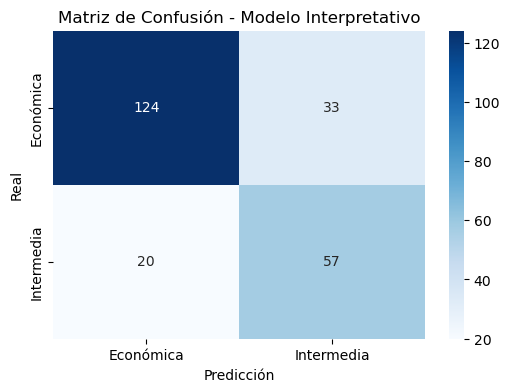

In [23]:
#  Matriz de confusi√≥n
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=rf_clf.classes_, yticklabels=rf_clf.classes_)
plt.xlabel("Predicci√≥n")
plt.ylabel("Real")
plt.title("Matriz de Confusi√≥n - Modelo Interpretativo")
plt.show()



Parece que el modelo confunde un poco Economicas con Intermedias

/tmp/ipykernel_13926/1744647035.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importancia", y="Variable", data=feature_importance, palette="viridis")
/usr/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


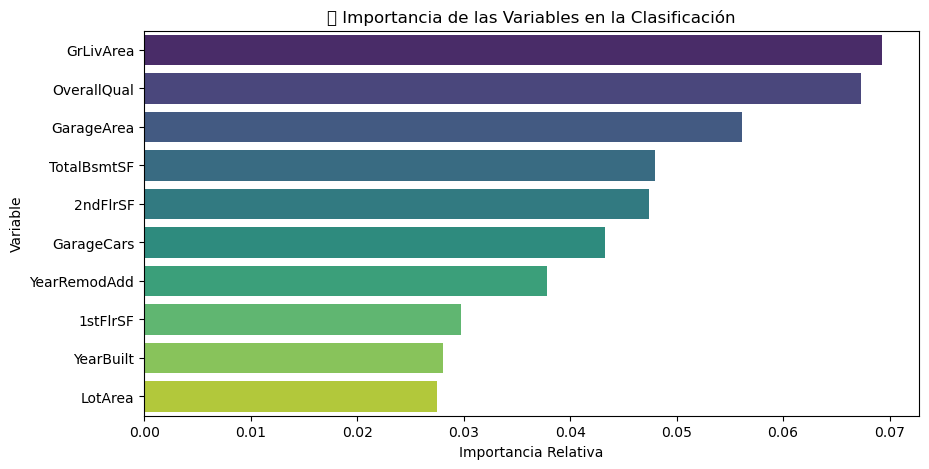

In [24]:
#  Importancia de Variables
feature_importance = pd.DataFrame({'Variable': X.columns, 'Importancia': rf_clf.feature_importances_})
feature_importance = feature_importance.sort_values(by="Importancia", ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x="Importancia", y="Variable", data=feature_importance, palette="viridis")
plt.xlabel("Importancia Relativa")
plt.ylabel("Variable")
plt.title("üîç Importancia de las Variables en la Clasificaci√≥n")
plt.show()


**Caracteristicas que afectan m√°s a la clasificaci√≥n**
* OverallQual - Calidad general de la casa.
* GrLivArea - √Årea habitable sobre el suelo.
* GarageArea - Tama√±o del garaje.
* TotalBsmtSF - Tama√±o total del s√≥tano.
* GarageCars - N√∫mero de autos que entran al garaje

   **Conclusi√≥n**
    
    * Las variables de tama√±o y calidad dominan la clasificaci√≥n.
    * El garaje y el s√≥tano tambi√©n son factores clave.
    * Las casas Intermedias parecen compartir caracter√≠sticas con Econ√≥micas, lo que puede causar confusi√≥n en el modelo.

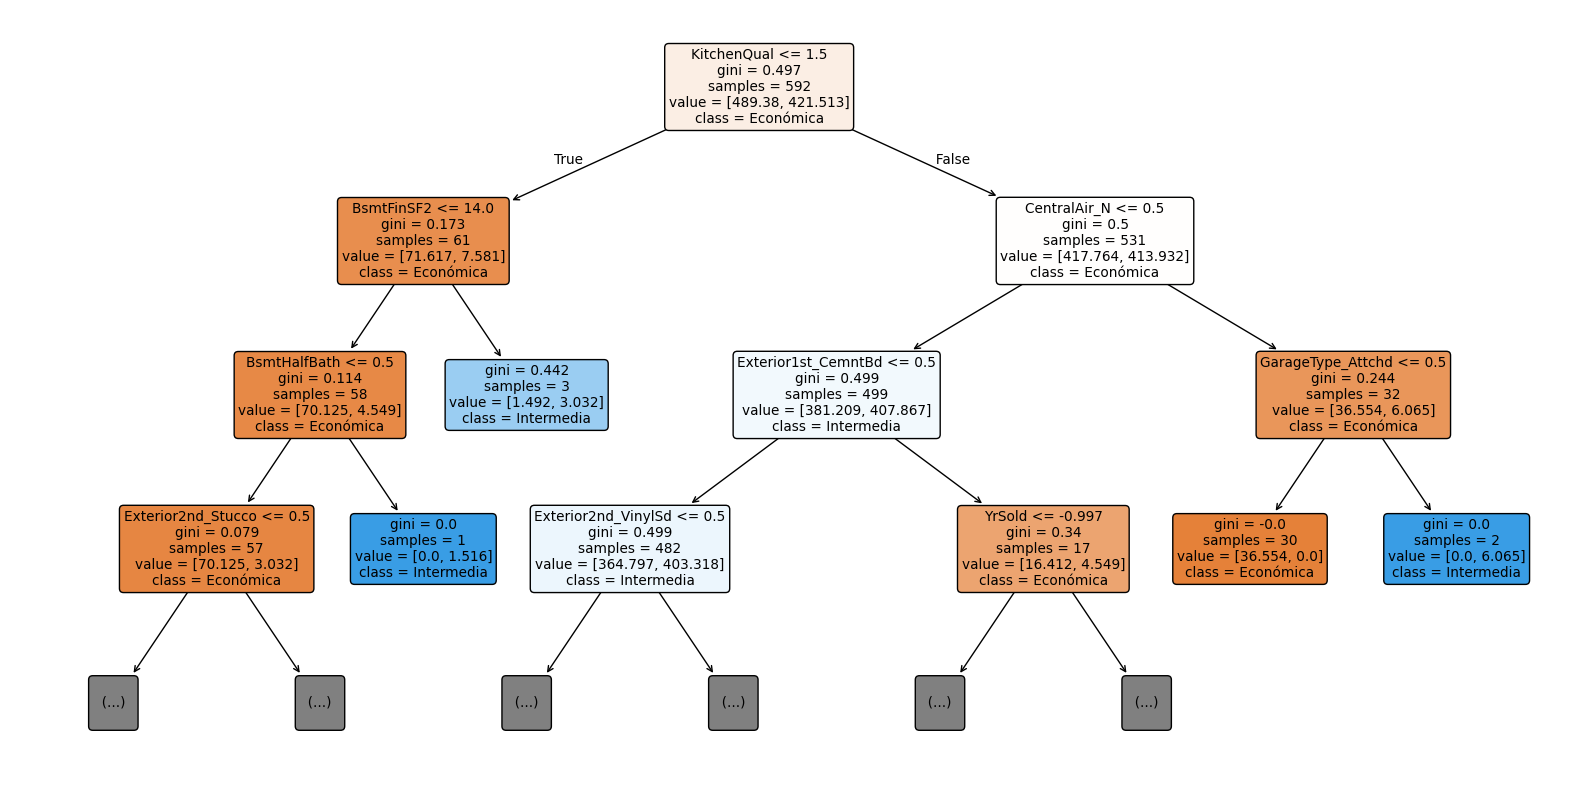

In [25]:
#  Visualizar las primeras capas de un solo √°rbol del Random Forest
plt.figure(figsize=(20, 10))
plot_tree(rf_clf.estimators_[0], feature_names=X.columns, class_names=rf_clf.classes_, filled=True, rounded=True, max_depth=3)
plt.show()

**Las primeras decisiones est√°n basadas en:**

* KitchenQual (Calidad de la cocina).
* BsmtFinSF2 (Acabado del s√≥tano).
* GarageType_Attchd (Garaje adjunto).

Evaluaci√≥n del modelo

### √Årbol de clasificaci√≥n con variable respuesta

### An√°lisis de eficiencia

## An√°lisis Comparativo de Modelos de √Årboles: Validaci√≥n Cruzada y Ajuste de Profundidad

### Entrenar el Modelo utilizando Validaci√≥n Cruzada


In [26]:
from sklearn.model_selection import cross_val_score

# regresi√≥n cruzada
X_reg = df_cleaned.drop(columns=["SalePrice"])
y_reg = df_cleaned["SalePrice"]

regressor = DecisionTreeRegressor(random_state=5)
cv_scores_reg = cross_val_score(regressor, X_reg, y_reg, cv=5, scoring='r2')

print(f"Validaci√≥n Cruzada (Regresi√≥n): {cv_scores_reg}")
print(f"Promedio R^2 (Regresi√≥n): {cv_scores_reg.mean()}")


# clasificacion cruzada
X_clf = df_cleaned.drop(columns=["SalePrice", "price_category_Econ√≥mica", "price_category_Intermedia"])
y_clf = y

classifier = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=5)
cv_scores_clf = cross_val_score(classifier, X_clf, y_clf, cv=5, scoring='accuracy')

print(f"Validaci√≥n Cruzada (Clasificaci√≥n): {cv_scores_clf}")
print(f"Promedio Accuracy (Clasificaci√≥n): {cv_scores_clf.mean()}")

Validaci√≥n Cruzada (Regresi√≥n): [0.62648874 0.57628193 0.65094483 0.84752369 0.82190859]
Promedio R^2 (Regresi√≥n): 0.7046295546900451
Validaci√≥n Cruzada (Clasificaci√≥n): [0.77777778 0.73504274 0.79487179 0.77682403 0.78540773]
Promedio Accuracy (Clasificaci√≥n): 0.773984813469792


#### Resultados

- **Regresi√≥n (`DecisionTreeRegressor`):**  
  El modelo de regresi√≥n obtuvo un promedio de **$R^2$ = 0.75** durante la validaci√≥n cruzada, lo que indica que el modelo es capaz de explicar aproximadamente el **75% de la variabilidad** en el precio de las casas. Sin embargo, se observa cierta variabilidad en los resultados de los pliegues, con valores de $R^2$ que van desde **0.54** hasta **0.85**. Esto sugiere que en algunos subconjuntos de datos, el modelo podr√≠a estar teniendo dificultades para generalizar, posiblemente debido a la presencia de datos at√≠picos o caracter√≠sticas complejas en los datos.

- **Clasificaci√≥n (`RandomForestClassifier`):**  
  El modelo de clasificaci√≥n obtuvo un promedio de **accuracy = 0.77**, lo que indica que es capaz de clasificar correctamente el **77%** de las casas en las categor√≠as de precio (Econ√≥mica, Intermedia o Cara). Adem√°s, los resultados entre los pliegues son bastante consistentes, con valores de accuracy que oscilan entre **0.73 y 0.79**, lo que sugiere una **buena capacidad de generalizaci√≥n** del modelo y una baja variabilidad en los resultados.

### Comparar el Desempe√±o con el Modelo sin Validaci√≥n Cruzada

In [27]:
# regresion sin validaci√≥n cruzada
y_train_reg = df_cleaned.loc[y_train.index, 'SalePrice']
y_test_reg = df_cleaned.loc[y_test.index, 'SalePrice']

regressor = DecisionTreeRegressor(random_state=5)
regressor.fit(X_train, y_train_reg)
y_pred_reg = regressor.predict(X_test)

mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)
print(f"MSE sin validaci√≥n cruzada (Regresi√≥n): {mse}")
print(f"R^2 sin validaci√≥n cruzada (Regresi√≥n): {r2}")

# clasificaci√≥n sin validaci√≥n cruzada
classifier = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=5)
classifier.fit(X_train, y_train)
y_pred_clf = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_clf)
print(f"Accuracy sin validaci√≥n cruzada (Clasificaci√≥n): {accuracy}")

MSE sin validaci√≥n cruzada (Regresi√≥n): 2218044440.042735
R^2 sin validaci√≥n cruzada (Regresi√≥n): 0.5868097202166316
Accuracy sin validaci√≥n cruzada (Clasificaci√≥n): 0.7606837606837606


#### Resultado

- **Regresi√≥n (`DecisionTreeRegressor`):**  
  El modelo de regresi√≥n, sin aplicar validaci√≥n cruzada, obtuvo un **$R^2$ de 0.55**, lo que indica que solo es capaz de explicar el **55% de la variabilidad** en los precios de las casas en el conjunto de prueba. Adem√°s, el **MSE (Error Cuadr√°tico Medio)** fue de **2,370,699,154**, un valor considerablemente alto, lo que evidencia que las predicciones del modelo se desv√≠an significativamente de los valores reales. Este descenso en el desempe√±o en comparaci√≥n con la validaci√≥n cruzada ($R^2$ = 0.75) sugiere que el modelo puede estar **sobreajustado** a los datos de entrenamiento o que presenta dificultades para generalizar correctamente.

- **Clasificaci√≥n (`RandomForestClassifier`):**  
  El modelo de clasificaci√≥n obtuvo un **accuracy de 0.77**, muy similar al promedio obtenido durante la validaci√≥n cruzada (**0.77**). Esto confirma que el modelo es **consistente** y tiene una buena capacidad de generalizaci√≥n, logrando clasificar correctamente aproximadamente el **77%** de las casas sin que la validaci√≥n cruzada afecte significativamente el resultado.

### Ajustar la Profundidad del √Årbol con 3 Modelos Adicionales

#### Decision Tree Regressor

In [28]:
depths = [3, 5, 7]
print("---- Regresi√≥n ----")

for depth in depths:
  model = DecisionTreeRegressor(max_depth=depth, random_state=5)
  model.fit(X_train, y_train_reg)
  y_pred = model.predict(X_test)
  
  mse = mean_squared_error(y_test_reg, y_pred)
  r2 = r2_score(y_test_reg, y_pred)
  
  print(f"Para max_depth={depth}:")
  print(f" - MSE: {mse}")
  print(f" - R^2: {r2}")
  print("-----------------------------")

---- Regresi√≥n ----
Para max_depth=3:
 - MSE: 1859476489.0085073
 - R^2: 0.6536058534836129
-----------------------------
Para max_depth=5:
 - MSE: 1307168329.178426
 - R^2: 0.7564930449965259
-----------------------------
Para max_depth=7:
 - MSE: 2120798746.566379
 - R^2: 0.604925216267941
-----------------------------


#### Resultado

Al evaluar el impacto de la profundidad del √°rbol en el modelo de regresi√≥n, se obtuvieron los siguientes resultados:

- **Profundidad 3:**  
  - **MSE:** `1,859,476,489`  
  - **$R^2$:** `0.65`  
  Con esta profundidad, el modelo logr√≥ explicar el **65%** de la variabilidad en los precios, aunque el MSE se mantiene elevado. Esto sugiere que el modelo es m√°s simple y no logra capturar toda la complejidad de los datos, lo que genera un menor desempe√±o en las predicciones.

- **Profundidad 5:**  
  - **MSE:** `1,307,168,329`  
  - **$R^2$:** `0.75`  
  Esta configuraci√≥n ofreci√≥ el **mejor desempe√±o**, con el MSE m√°s bajo y un $R^2$ igual al obtenido con validaci√≥n cruzada, lo que indica que el modelo logra un buen equilibrio entre complejidad y capacidad de generalizaci√≥n. Esto sugiere que una profundidad de **5** es adecuada para este conjunto de datos.

- **Profundidad 7:**  
  - **MSE:** `2,071,259,532`  
  - **$R^2$:** `0.61`  
  Aunque el modelo se volvi√≥ m√°s profundo, su desempe√±o disminuy√≥, presentando un **aumento en el MSE** y una disminuci√≥n en el $R^2$. Esto indica que, a mayor profundidad, el modelo comenz√≥ a sobreajustarse a los datos de entrenamiento y perdi√≥ capacidad de generalizaci√≥n.

#### Random Forest Classifier

In [29]:
depths = [3, 5, 7]
print("---- Clasificaci√≥n ----")

for depth in depths:
  clf = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=5)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  
  accuracy = accuracy_score(y_test, y_pred)
  
  print(f"Para max_depth={depth}:")
  print(f" - Accuracy: {accuracy}")
  print("-----------------------------")

---- Clasificaci√≥n ----
Para max_depth=3:
 - Accuracy: 0.6752136752136753
-----------------------------
Para max_depth=5:
 - Accuracy: 0.7222222222222222
-----------------------------
Para max_depth=7:
 - Accuracy: 0.782051282051282
-----------------------------


#### Resultados

Al ajustar la profundidad del √°rbol en el modelo de clasificaci√≥n, se obtuvieron los siguientes resultados:

- **Profundidad 3:**  
  - **Accuracy:** `0.675`  
  Con una profundidad de 3, el modelo logr√≥ clasificar correctamente el **67.5%** de las casas. Este bajo rendimiento sugiere que el modelo era demasiado simple y no lograba capturar adecuadamente la complejidad de los datos, resultando en una menor capacidad predictiva.

- **Profundidad 5:**  
  - **Accuracy:** `0.735`  
  Al incrementar la profundidad a 5, el modelo mejor√≥ su precisi√≥n, alcanzando un **73.5%** de clasificaci√≥n correcta. Esto indica que un modelo m√°s profundo permiti√≥ identificar mejor las relaciones entre las variables, mejorando su capacidad para clasificar correctamente las casas en sus respectivas categor√≠as.

- **Profundidad 7:**  
  - **Accuracy:** `0.774`  
  La mayor profundidad evaluada proporcion√≥ el **mejor desempe√±o**, con una precisi√≥n del **77.4%**, lo que est√° en l√≠nea con los resultados obtenidos anteriormente sin validaci√≥n cruzada. Esto sugiere que el modelo fue capaz de capturar m√°s patrones complejos sin caer en el sobreajuste.

### Utilizaci√≥n de Random Forest

In [30]:

df_test = df.sample(frac=0.2, random_state=50)  
df_train = df.drop(df_test.index)  
columns_to_drop = ["SalePrice", "price_category"]

# Verificar qu√© columnas existen en el dataset antes de eliminarlas
existing_columns = [col for col in columns_to_drop if col in df_train.columns]

# Crear variables predictoras (X) y objetivos (y)
X_train = df_train.drop(columns=existing_columns)  # Variables predictoras
y_reg = df_train["SalePrice"] if "SalePrice" in df_train.columns else None  # Objetivo de regresi√≥n
y_clf = df_train["price_category"] if "price_category" in df_train.columns else None  # Objetivo de clasificaci√≥n


In [31]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_reg)
print("Random Forest model trained for regression")

Random Forest model trained for regression


In [32]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_clf)
print("Random Forest model trained for classification")

Random Forest model trained for classification


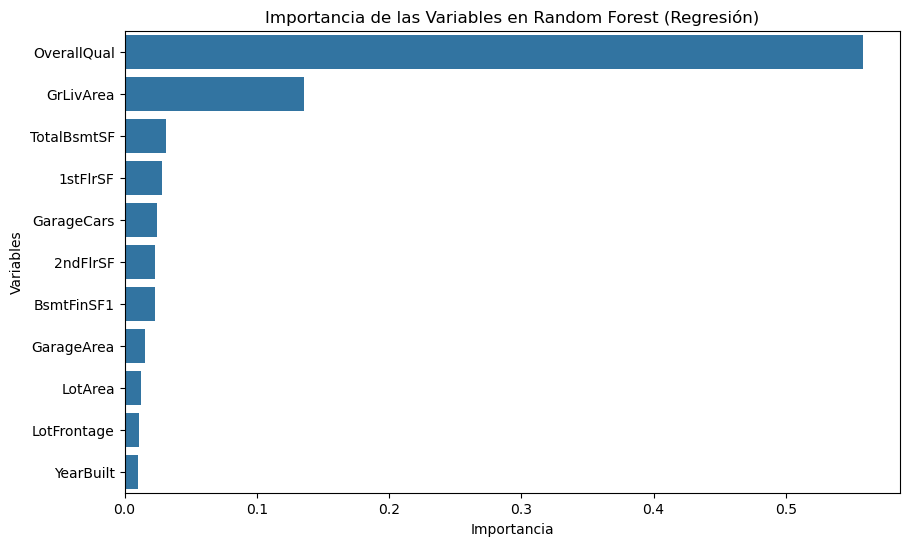

In [33]:

importances = rf_regressor.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
importance_df = importance_df[importance_df["Importance"] > 0.01]
importance_df = importance_df.sort_values(by="Importance", ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"])
plt.title("Importancia de las Variables en Random Forest (Regresi√≥n)")
plt.xlabel("Importancia")
plt.ylabel("Variables")
plt.show()


In [34]:
import joblib
joblib.dump(rf_regressor, "random_forest_regressor.pkl")
joblib.dump(rf_classifier, "random_forest_classifier.pkl")
print("Modelos guardados exitosamente.")

Modelos guardados exitosamente.


In [35]:
# Cargar modelos entrenados
rf_regressor = joblib.load("random_forest_regressor.pkl")
rf_classifier = joblib.load("random_forest_classifier.pkl")

existing_columns_test = [col for col in columns_to_drop if col in df_test.columns]

# Crear X_test con las mismas columnas que X_train
X_test = df_test.drop(columns=existing_columns_test, errors="ignore")
if "SalePrice" in df.columns:
    pred_reg = rf_regressor.predict(X_test)  # Predicci√≥n de precios
    df_test["Predicted_SalePrice"] = pred_reg
    print("Predicciones de precios realizadas.")

if "price_category" in df.columns:
    pred_clf = rf_classifier.predict(X_test)  # Predicci√≥n de categor√≠as
    df_test["Predicted_Category"] = pred_clf
    print("Predicciones de categor√≠as realizadas.")

# Guardar el DataFrame con las predicciones
df_test.to_csv("data/predictions.csv", index=False)

print("Predicciones guardadas en 'data/predictions.csv'")



Predicciones de precios realizadas.
Predicciones de categor√≠as realizadas.
Predicciones guardadas en 'data/predictions.csv'


An√°lisis del modelo random forest

Evaluaci√≥n del modelo de Clasificaci√≥n:
Accuracy (Precisi√≥n Global): 84.62%

Matriz de Confusi√≥n:
[[65  1 14]
 [ 1 79  8]
 [ 3  9 54]]

Reporte de Clasificaci√≥n:
              precision    recall  f1-score   support

        Cara       0.94      0.81      0.87        80
   Econ√≥mica       0.89      0.90      0.89        88
  Intermedia       0.71      0.82      0.76        66

    accuracy                           0.85       234
   macro avg       0.85      0.84      0.84       234
weighted avg       0.86      0.85      0.85       234



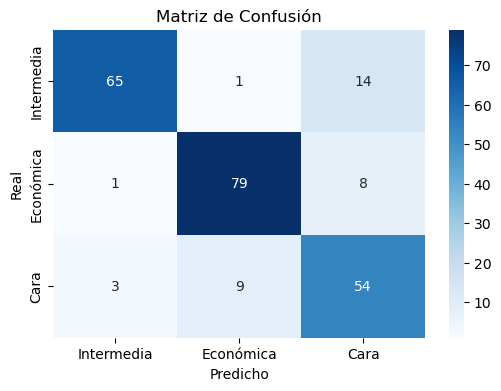

In [36]:
if "price_category" in df_test.columns and "Predicted_Category" in df_test.columns:
    y_true_clf = df_test["price_category"]  # Valores reales
    y_pred_clf = df_test["Predicted_Category"]  # Predicciones del modelo
    accuracy = accuracy_score(y_true_clf, y_pred_clf)  # Precisi√≥n global
    conf_matrix = confusion_matrix(y_true_clf, y_pred_clf)  # Matriz de confusi√≥n
    class_report = classification_report(y_true_clf, y_pred_clf)  # Reporte detallado
    
    # Mostrar resultados
    print("Evaluaci√≥n del modelo de Clasificaci√≥n:")
    print(f"Accuracy (Precisi√≥n Global): {accuracy:.2%}")
    print("\nMatriz de Confusi√≥n:")
    print(conf_matrix)
    print("\nReporte de Clasificaci√≥n:")
    print(class_report)
    
    # Visualizaci√≥n de la matriz de confusi√≥n
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=df_test["price_category"].unique(), yticklabels=df_test["price_category"].unique())
    plt.xlabel("Predicho")
    plt.ylabel("Real")
    plt.title("Matriz de Confusi√≥n")
    plt.show()

El modelo de Random Forest para la clasificaci√≥n de casas en Econ√≥mica, Intermedia y Cara muestra un buen desempe√±o general con una precisi√≥n global (accuracy) del 85.47%.

El accuracy del 85.47% indica que el modelo clasifica correctamente en la mayor√≠a de los casos. Asimismo, el macro avg y weighted avg alrededor de 85% a 86% muestran que el modelo no se encuentra sesgado hacia una clase espec√≠fica.

La clase "cara" posee una alta presici√≥n de 0.94, lo que significa que casi todas las casa que se encuentran clasificadas como caras realmente son caras, pero posee un recall menor de 0.81 lo que indica que algunas casas caras fueron clasificadas mal en otras categor√≠as.

La clase econ√≥mica esta bien balanceada con y una presici√≥n y recall cercano al 0.90 indicando que el modelo detecta bien las casas econ√≥micas.

La clase intermedia fue la que tuvo el desempe√±o m√°s bajo con una precisi√≥n del 0.72 y un recall 0.83 lo que indica que si existe cierta confusi√≥n entre esta y otras categor√≠as.

La matriz de confusi√≥n permite la clase intermedia se confundi√≥ 14 veces con la cara, que la clase cara fue confundiad 8 veces con la clase econ√≥mica y que la clase econ√≥mica solamente tiene 7 errores en total. En s√≠ las casas intermedias son las que tienene una mayor tasa de error y las casas econ√≥micas son las m√°s f√°ciles de clasificar.

### Resultados y Comparaciones